# Prediction using Unsupervised ML

## by

# Ajirioghene Oguh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

iris_df = pd.DataFrame(data = np.c_[iris["data"],iris["target"]],
                       columns = iris["feature_names"] +["Flower"])

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Flower'],
      dtype='object')

In [5]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [6]:
iris_df["Flower"].unique()

array([0., 1., 2.])

In [7]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
std = StandardScaler()
X = std.fit_transform(iris_df.values[:,:-1])
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [9]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\Developer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


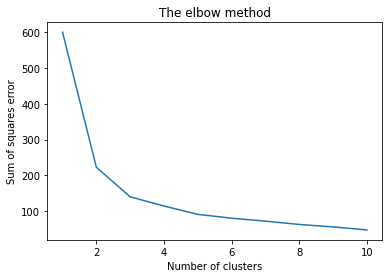

In [10]:
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares error') 
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)
y_predict = kmeans.fit_predict(X)
iris_df['cluster'] = y_predict

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower,cluster
0,5.1,3.5,1.4,0.2,0.0,1
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,1
3,4.6,3.1,1.5,0.2,0.0,1
4,5.0,3.6,1.4,0.2,0.0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,0
146,6.3,2.5,5.0,1.9,2.0,2
147,6.5,3.0,5.2,2.0,2.0,0
148,6.2,3.4,5.4,2.3,2.0,0


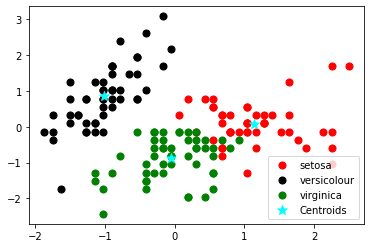

In [12]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 50, c = 'red', label = 'setosa')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 50, c = 'black', label = 'versicolour')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1],s = 50, c = 'green', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'cyan', marker = '*', label = 'Centroids')

plt.legend()

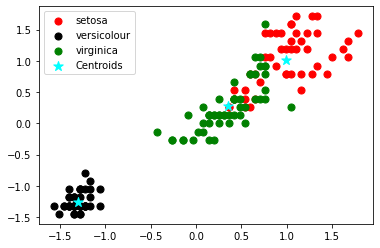

In [13]:
plt.scatter(X[y_predict == 0, 2], X[y_predict == 0, 3], s = 50, c = 'red', label = 'setosa')
plt.scatter(X[y_predict == 1, 2], X[y_predict == 1, 3], s = 50, c = 'black', label = 'versicolour')
plt.scatter(X[y_predict == 2, 2], X[y_predict == 2, 3],s = 50, c = 'green', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'cyan', marker = '*', label = 'Centroids')

plt.legend()